In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [56]:
df = pd.read_csv(r"C:\Users\Aalok kumar\Downloads\16275200\Customer-Lifetime-Value-Prediction\Data\AutoInsurance.csv")
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4          3/2/2011         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [58]:
df.shape

(9134, 24)

In [59]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [60]:
df.describe

<bound method NDFrame.describe of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor  

In [61]:
df.describe(include="all")

Customer       State  Customer Lifetime Value Response Coverage  \
count      9134        9134              9134.000000     9134     9134   
unique     9134           5                      NaN        2        3   
top     BU79786  California                      NaN       No    Basic   
freq          1        3150                      NaN     7826     5568   
mean        NaN         NaN              8004.940475      NaN      NaN   
std         NaN         NaN              6870.967608      NaN      NaN   
min         NaN         NaN              1898.007675      NaN      NaN   
25%         NaN         NaN              3994.251794      NaN      NaN   
50%         NaN         NaN              5780.182197      NaN      NaN   
75%         NaN         NaN              8962.167041      NaN      NaN   
max         NaN         NaN             83325.381190      NaN      NaN   

       Education Effective To Date EmploymentStatus Gender        Income  ...  \
count       9134              9134             9134   9134   9134.000000  ...   
unique         5                59                5      2           NaN  ...   
top     Bachelor         10/1/2011         Employed      F           NaN  ...   
freq        2748               195             5698   4658           NaN  ...   
mean         NaN               NaN              NaN    NaN  37657.380009  ...   
std          NaN               NaN              NaN    NaN  30379.904734  ...   
min          NaN               NaN              NaN    NaN      0.000000  ...   
25%          NaN               NaN              NaN    NaN      0.000000  ...   
50%          NaN               NaN              NaN    NaN  33889.500000  ...   
75%          NaN               NaN              NaN    NaN  62320.000000  ...   
max          NaN               NaN              NaN    NaN  99981.000000  ...   

       Months Since Policy Inception Number of Open Complaints  \
count                    9134.000000               9134.000000   
unique                           NaN                       NaN   
top                              NaN                       NaN   
freq                             NaN                       NaN   
mean                       48.064594                  0.384388   
std                        27.905991                  0.910384   
min                         0.000000                  0.000000   
25%                        24.000000                  0.000000   
50%                        48.000000                  0.000000   
75%                        71.000000                  0.000000   
max                        99.000000                  5.000000   

        Number of Policies    Policy Type       Policy  Renew Offer Type  \
count          9134.000000           9134         9134              9134   
unique                 NaN              3            9                 4   
top                    NaN  Personal Auto  Personal L3            Offer1   
freq                   NaN           6788         3426              3752   
mean              2.966170            NaN          NaN               NaN   
std               2.390182            NaN          NaN               NaN   
min               1.000000            NaN          NaN               NaN   
25%               1.000000            NaN          NaN               NaN   
50%               2.000000            NaN          NaN               NaN   
75%               4.000000            NaN          NaN               NaN   
max               9.000000            NaN          NaN               NaN   

        Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
count            9134        9134.000000           9134         9134  
unique              4                NaN              6            3  
top             Agent                NaN  Four-Door Car      Medsize  
freq             3477                NaN           4621         6424  
mean              NaN         434.088794            NaN          NaN  
std          

In [62]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [63]:
## EDA
#### CLV - Target variable analysis

C:\Users\Aalok kumar\AppData\Local\Temp\ipykernel_14776\3282505498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CLV"], kde=True, color='g')
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


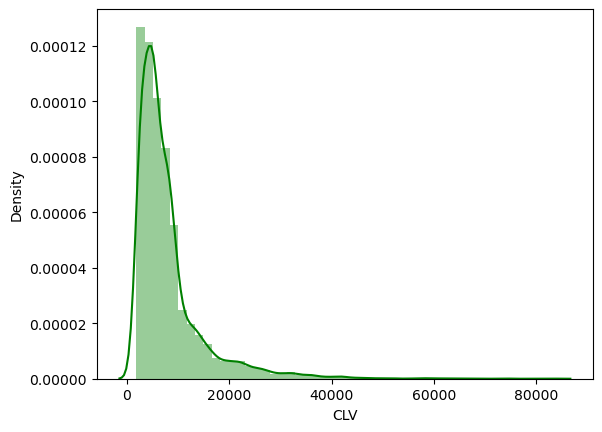

In [64]:
sns.distplot(df["CLV"], kde=True, color='g')
plt.show()

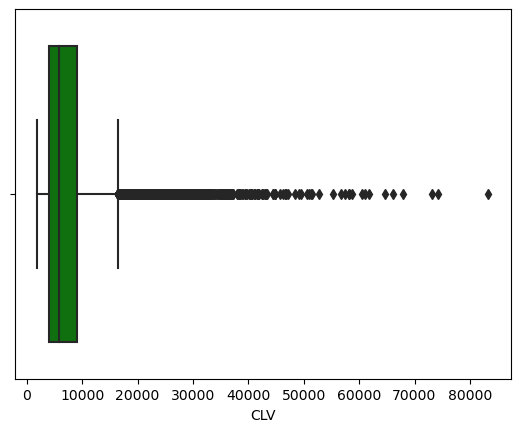

In [65]:
sns.boxplot(x="CLV",data=df,color='g')
plt.show()

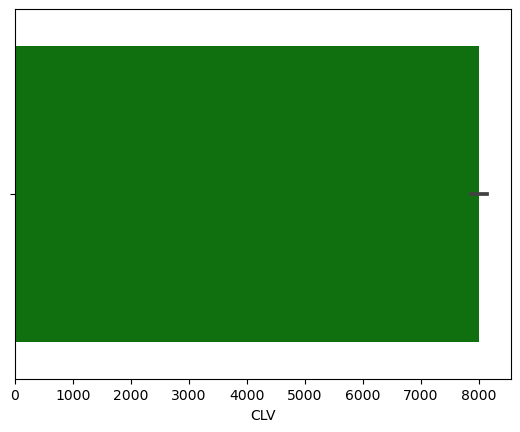

In [66]:
sns.barplot(x="CLV",hue="Gender",data=df,color='g')
plt.show()

In [67]:
df["CLV"].skew()

3.0322802599299847

C:\Users\Aalok kumar\AppData\Local\Temp\ipykernel_14776\656470461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"], kde=True, color='b')
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


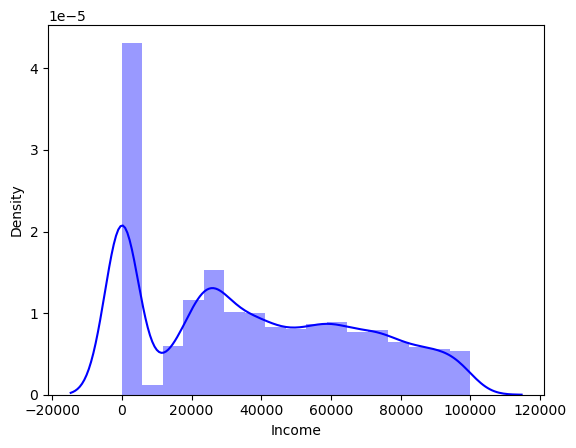

In [68]:
sns.distplot(df["Income"], kde=True, color='b')
plt.show()

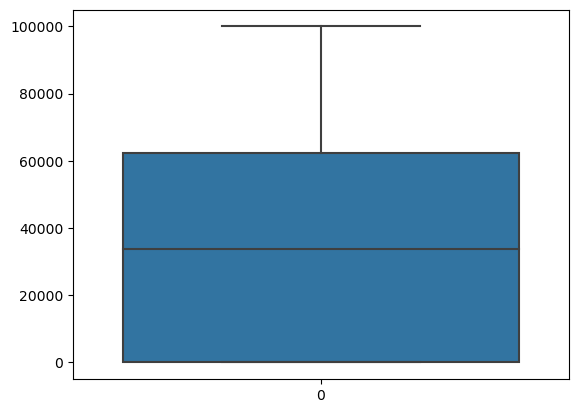

In [69]:
sns.boxplot(df["Income"])
plt.show()

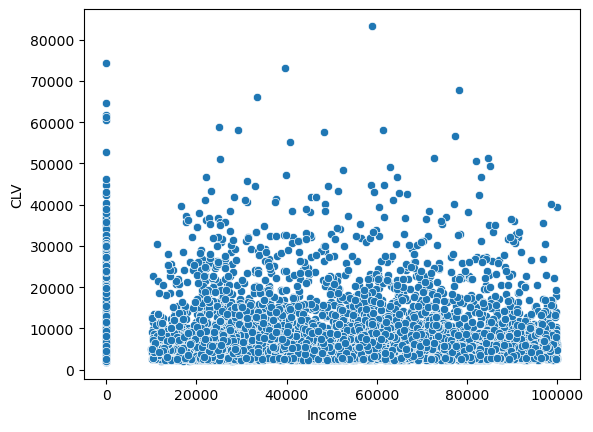

In [70]:
sns.scatterplot(x=df["Income"], y=df["CLV"])
plt.show()

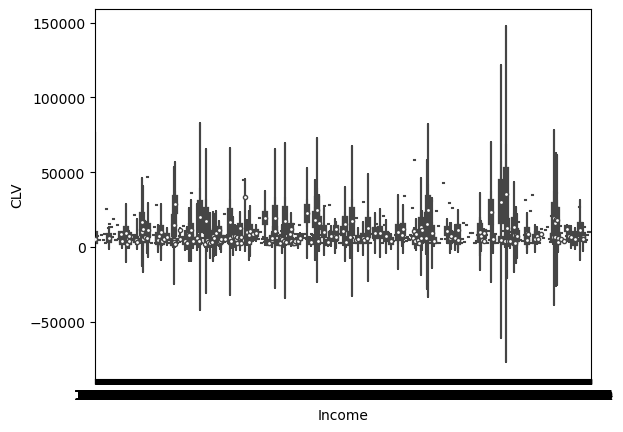

In [71]:
sns.violinplot(x=df["Income"],y=df["CLV"],data=df)
plt.show()

In [ ]:
#### Monthly Premium Auto

C:\Users\Aalok kumar\AppData\Local\Temp\ipykernel_14776\2066021974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Monthly Premium Auto"],color='r')
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


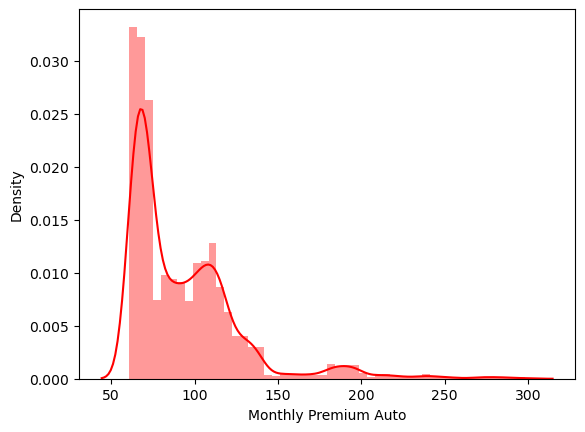

In [72]:
sns.distplot(df["Monthly Premium Auto"],color='r')
plt.show()

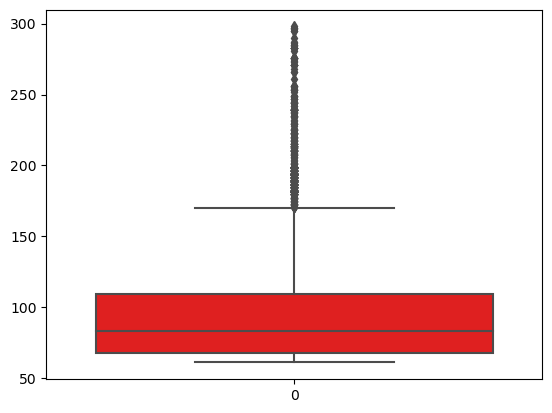

In [73]:
sns.boxplot(df["Monthly Premium Auto"],color='r')
plt.show()

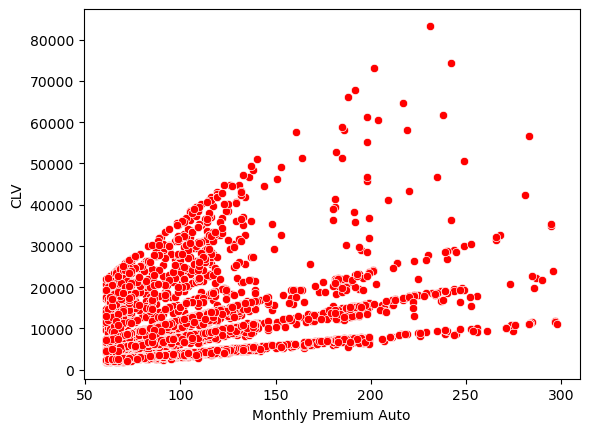

In [74]:
sns.scatterplot(x=df["Monthly Premium Auto"],y=df["CLV"],color='r')
plt.show()

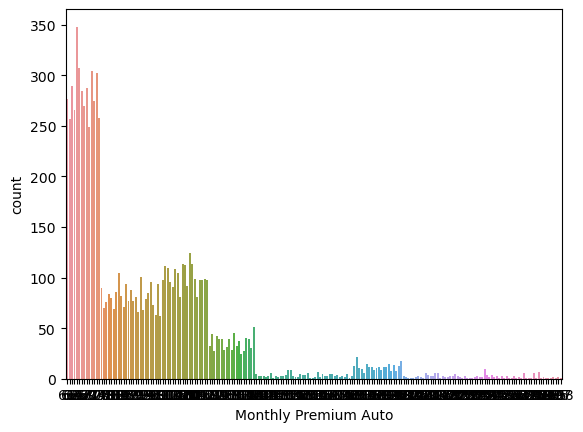

In [75]:
sns.countplot(x=df["Monthly Premium Auto"],data=df)
plt.show()

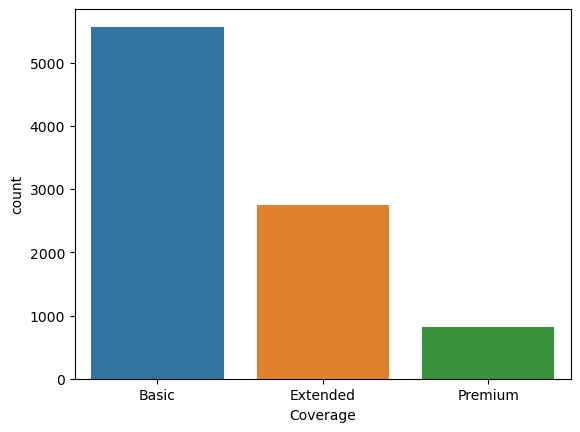

In [76]:
sns.countplot(x=df["Coverage"],data=df)
plt.show()

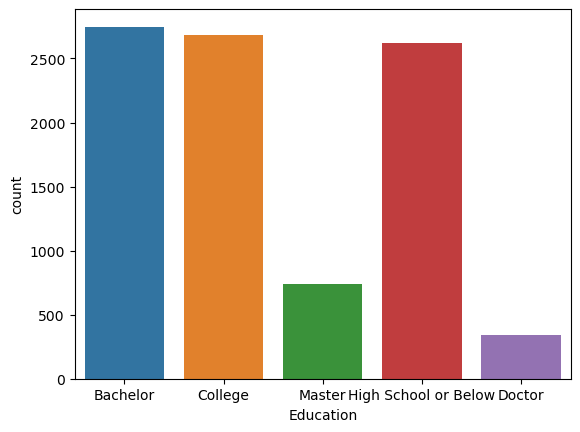

In [77]:
sns.countplot(x=df["Education"],data=df)
plt.show()

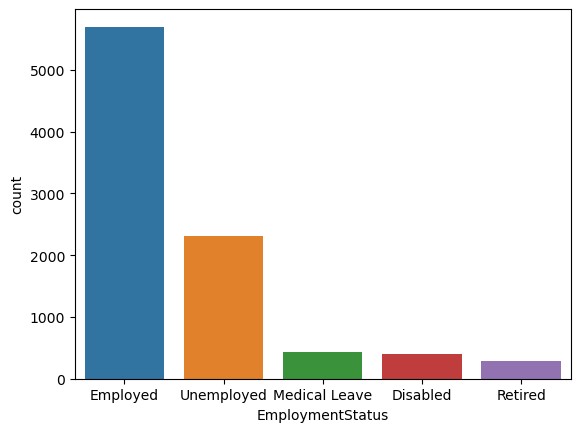

In [78]:
sns.countplot(x=df["EmploymentStatus"],data=df)
plt.show()

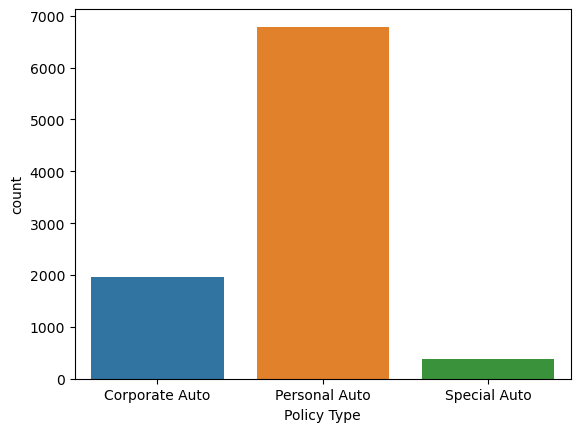

In [79]:
sns.countplot(x=df["Policy Type"],data=df)
plt.show()

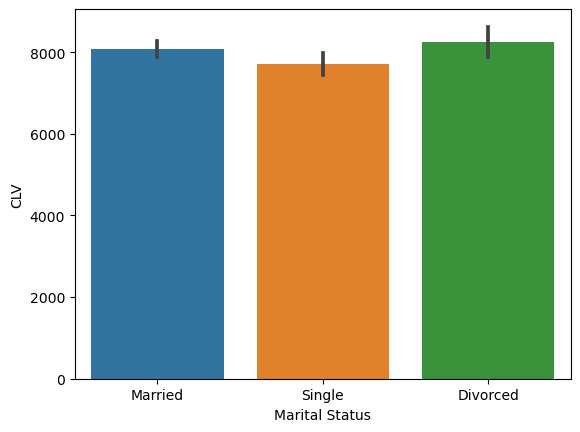

In [80]:
sns.barplot(x=df["Marital Status"],y=df["CLV"])
plt.show()

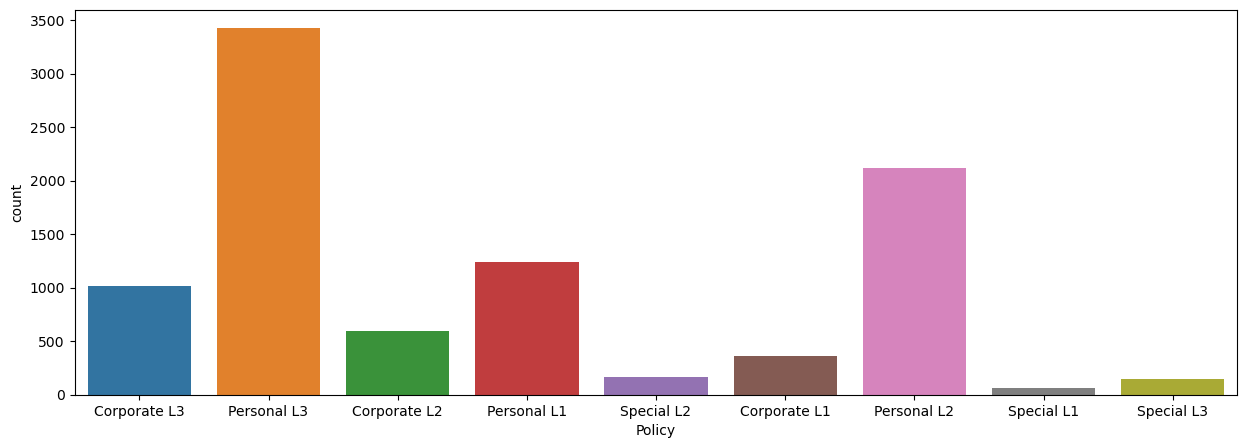

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Policy"],data=df)
plt.show()

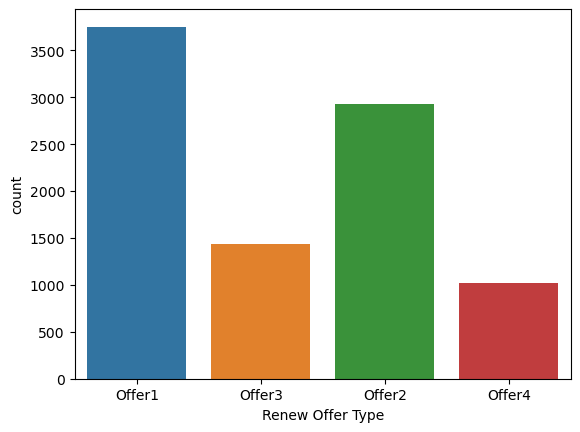

In [82]:
sns.countplot(x=df["Renew Offer Type"],data=df)
plt.show()

<Axes: xlabel='EmploymentStatus', ylabel='Income'>

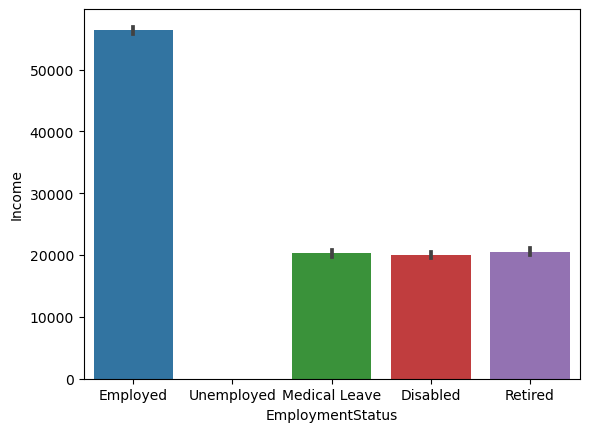

In [83]:
sns.barplot(x="EmploymentStatus",y="Income", data=df)

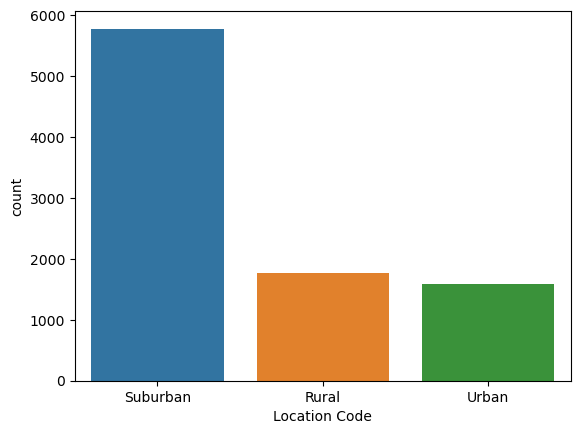

In [84]:
sns.countplot(x=df["Location Code"],data=df)
plt.savefig("location.png")
plt.show()

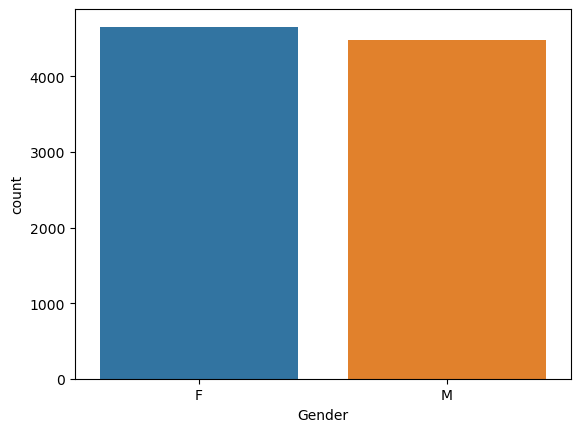

In [85]:
sns.countplot(x=df["Gender"],data=df)
plt.show()

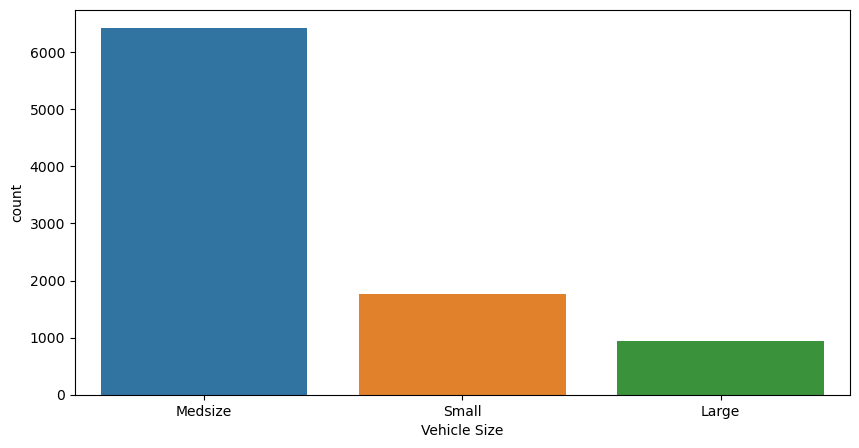

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Vehicle Size"],data=df)
plt.show()

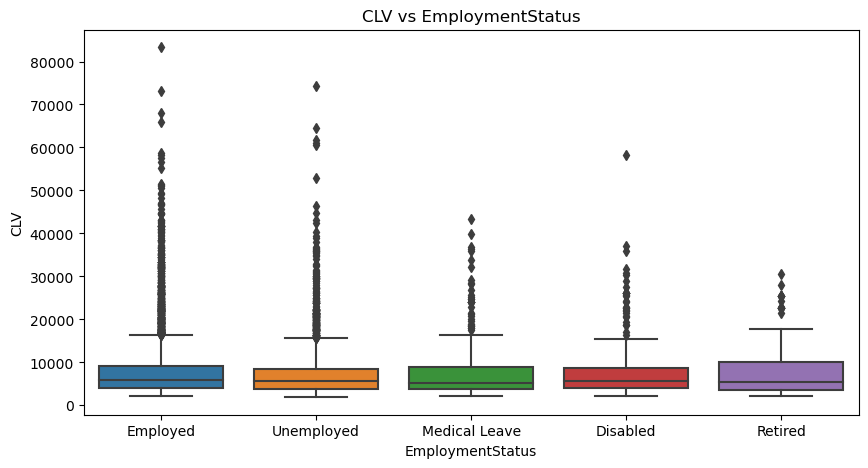

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
plt.show()

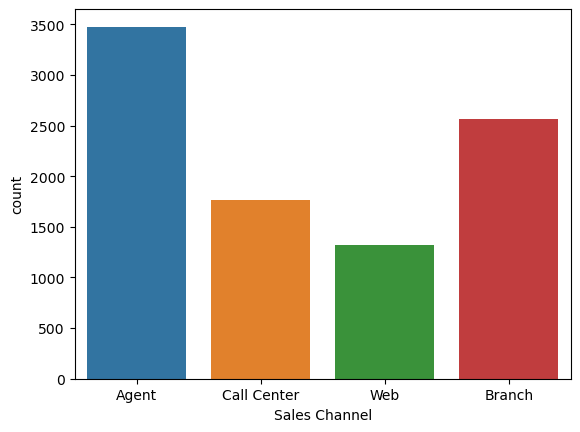

In [88]:
sns.countplot(x=df["Sales Channel"],data=df)
plt.show()

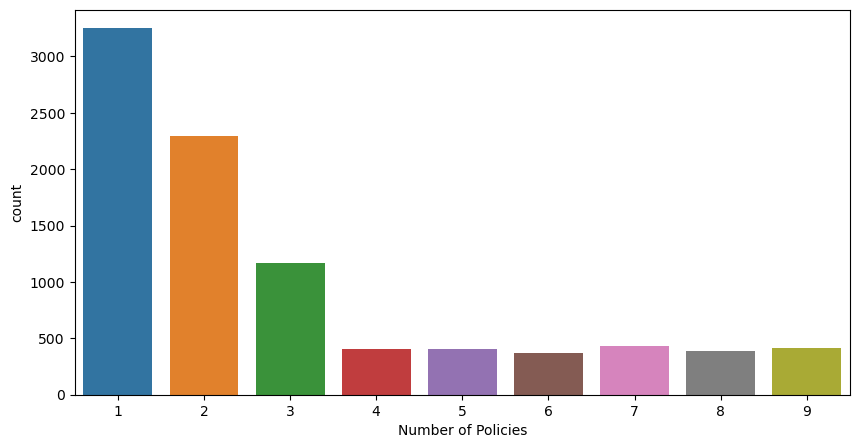

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Number of Policies"],data=df)
plt.show()

In [90]:
### Heatmap

In [91]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

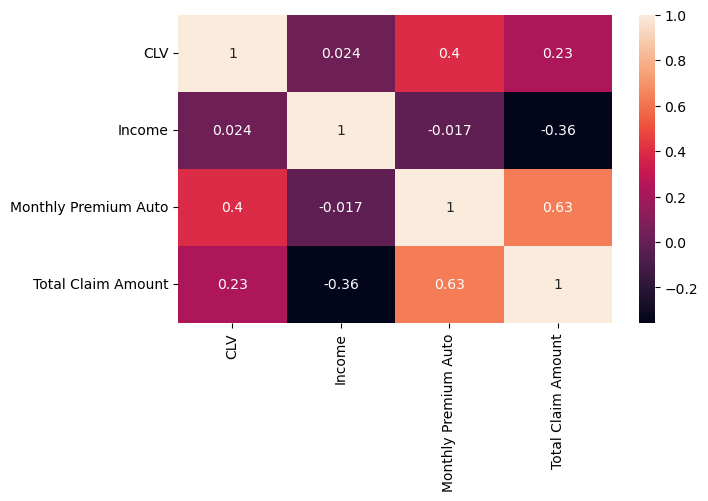

In [92]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

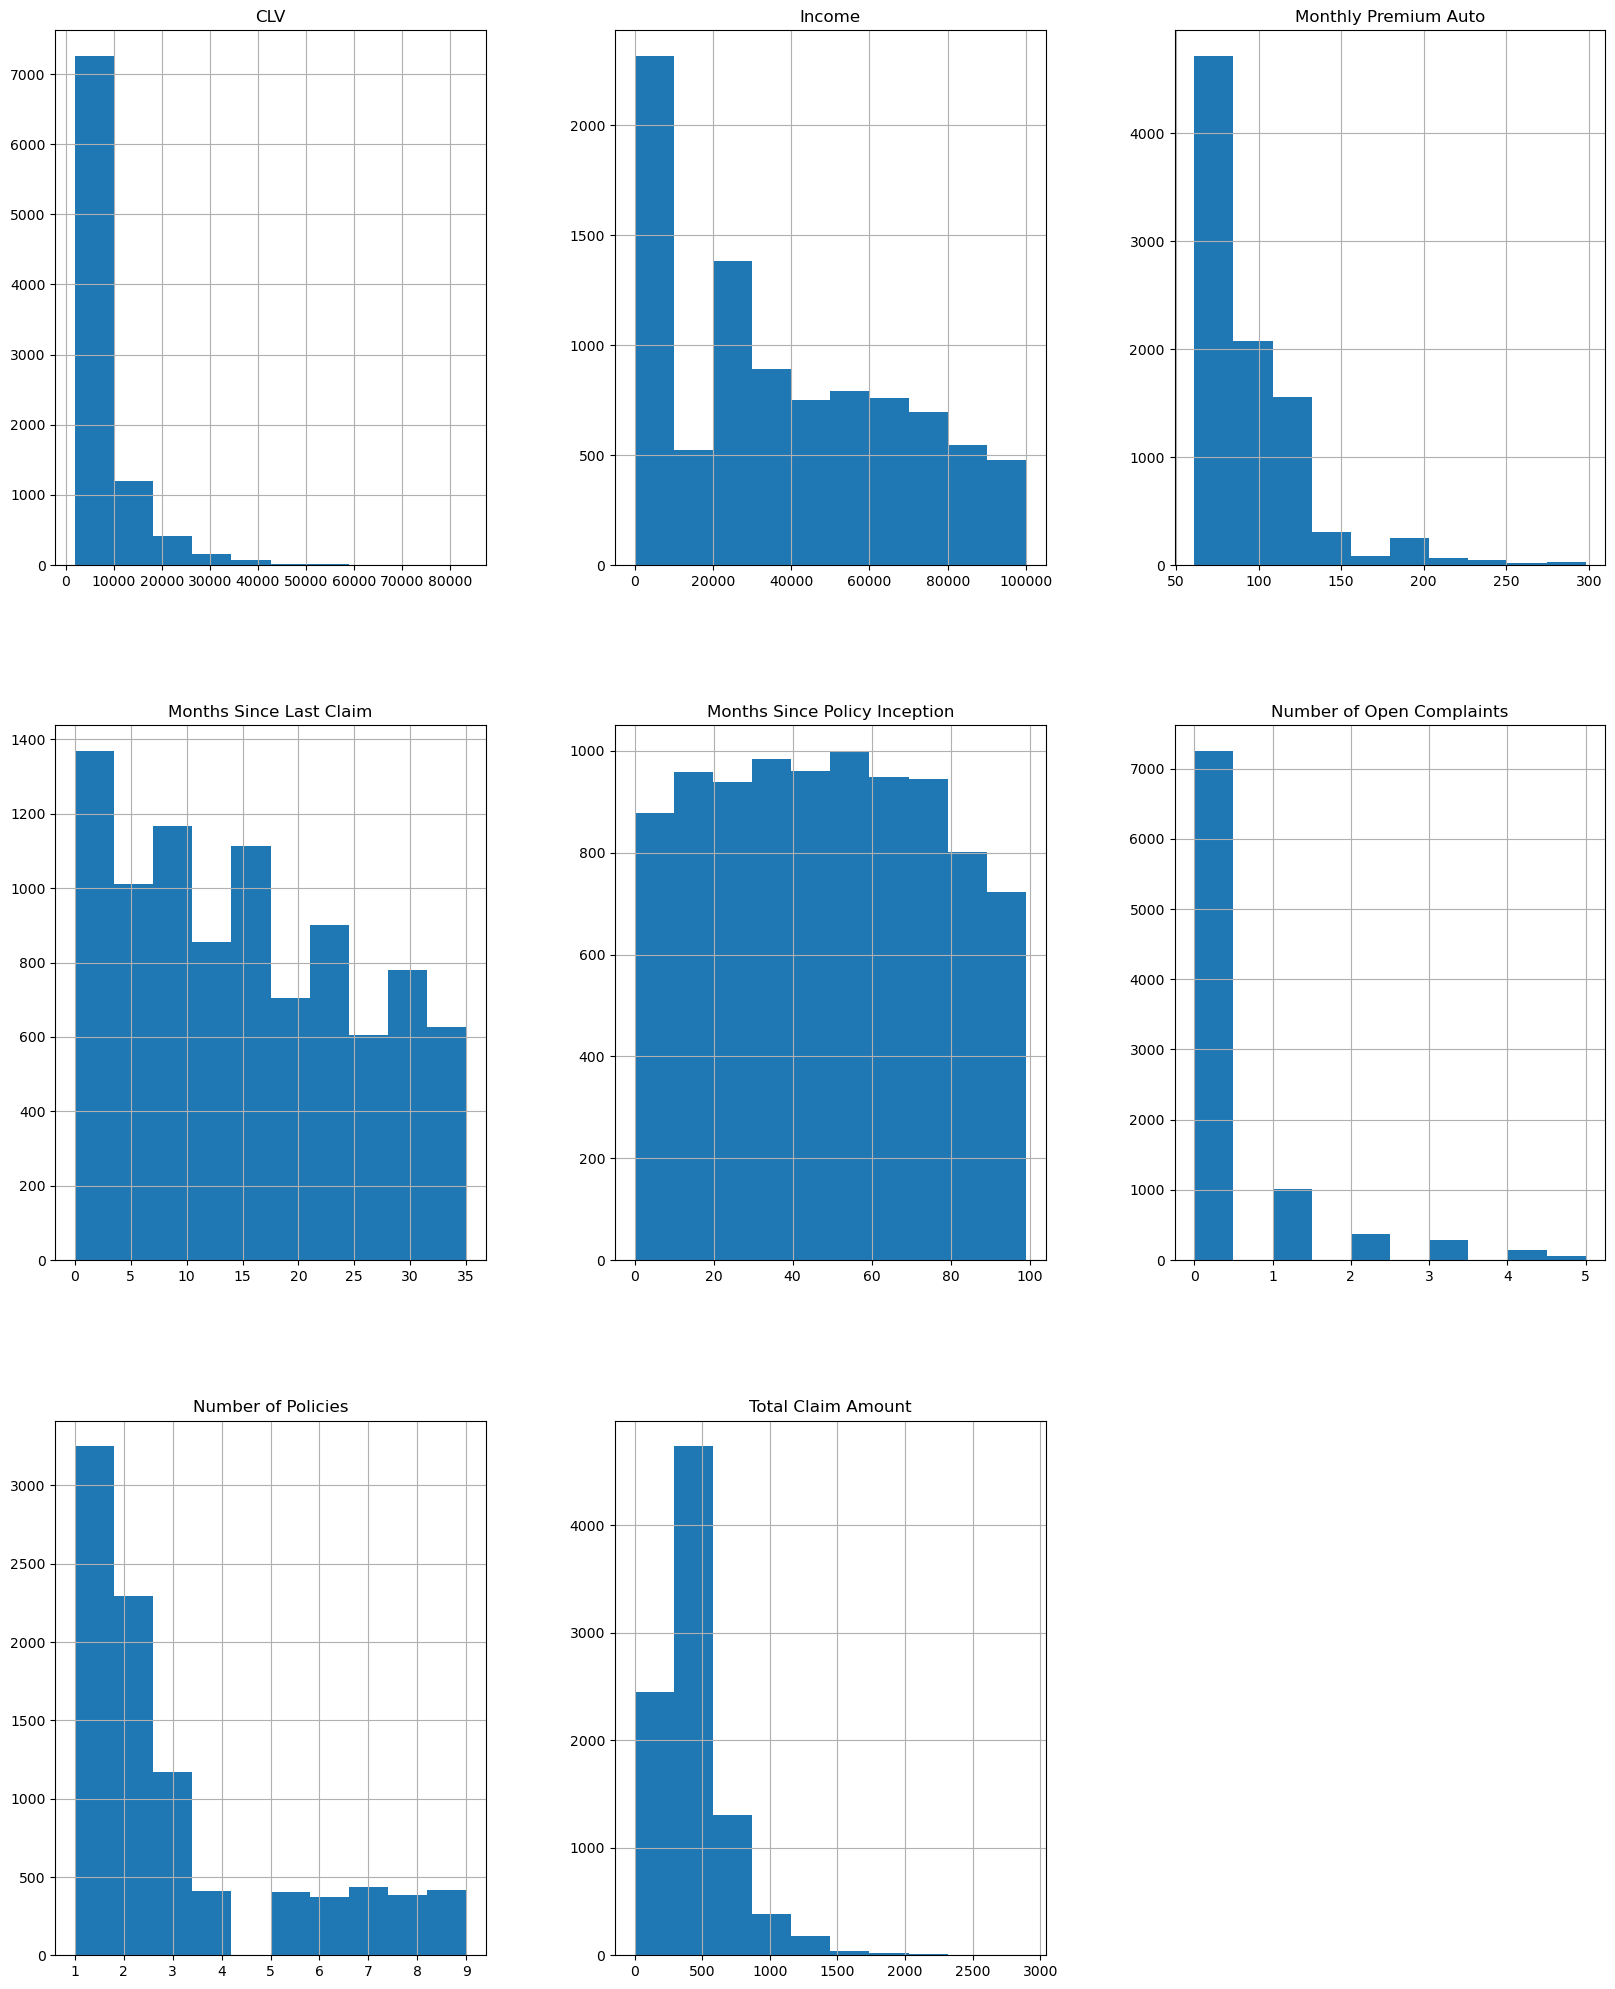

In [93]:
df.hist(figsize=(20,25))
plt.show()

In [94]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']

C:\Users\Aalok kumar\AppData\Local\Temp\ipykernel_14776\3761714428.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Ba, label='Basic', shade=False)
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aalok kumar\AppData\Local\Temp\ipykernel_14776\3761714428.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Ex, label='Extended', shade=False)
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

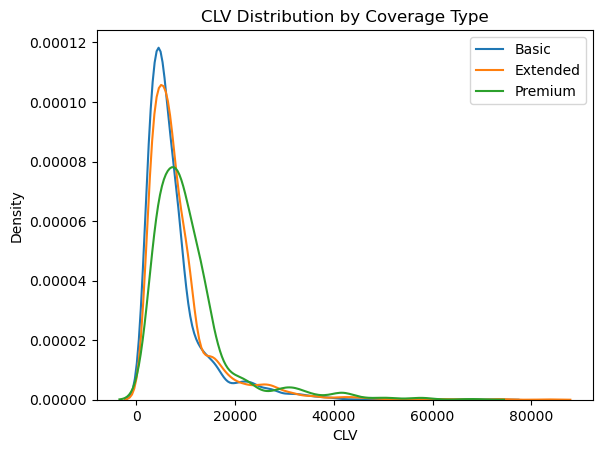

In [102]:
sns.kdeplot(Ba, label='Basic', shade=False)
sns.kdeplot(Ex, label='Extended', shade=False)
sns.kdeplot(Pr, label='Premium', shade=False)

# Adding labels and title for clarity
plt.xlabel('CLV')
plt.ylabel('Density')
plt.title('CLV Distribution by Coverage Type')
plt.legend()
plt.show()

In [103]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']

C:\Users\Aalok kumar\AppData\Local\Temp\ipykernel_14776\3085957530.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Ba, label='Bachelor', shade=False)
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aalok kumar\AppData\Local\Temp\ipykernel_14776\3085957530.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Co, label='College', shade=False)
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conve

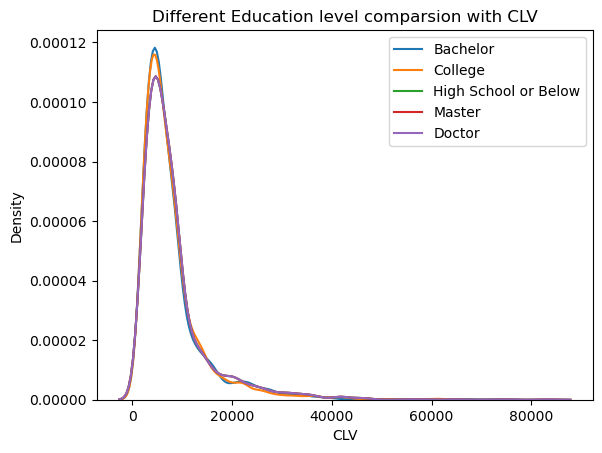

In [104]:
sns.kdeplot(Ba, label='Bachelor', shade=False)
sns.kdeplot(Co, label='College', shade=False)
sns.kdeplot(Hi, label='High School or Below', shade=False)
sns.kdeplot(Hi, label='Master', shade=False)
sns.kdeplot(Hi, label='Doctor', shade=False)

# Adding labels and title for clarity
plt.xlabel('CLV')
plt.ylabel('Density')
plt.title('Different Education level comparsion with CLV')
plt.legend()
plt.show()

C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: 

C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Aalok kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: 

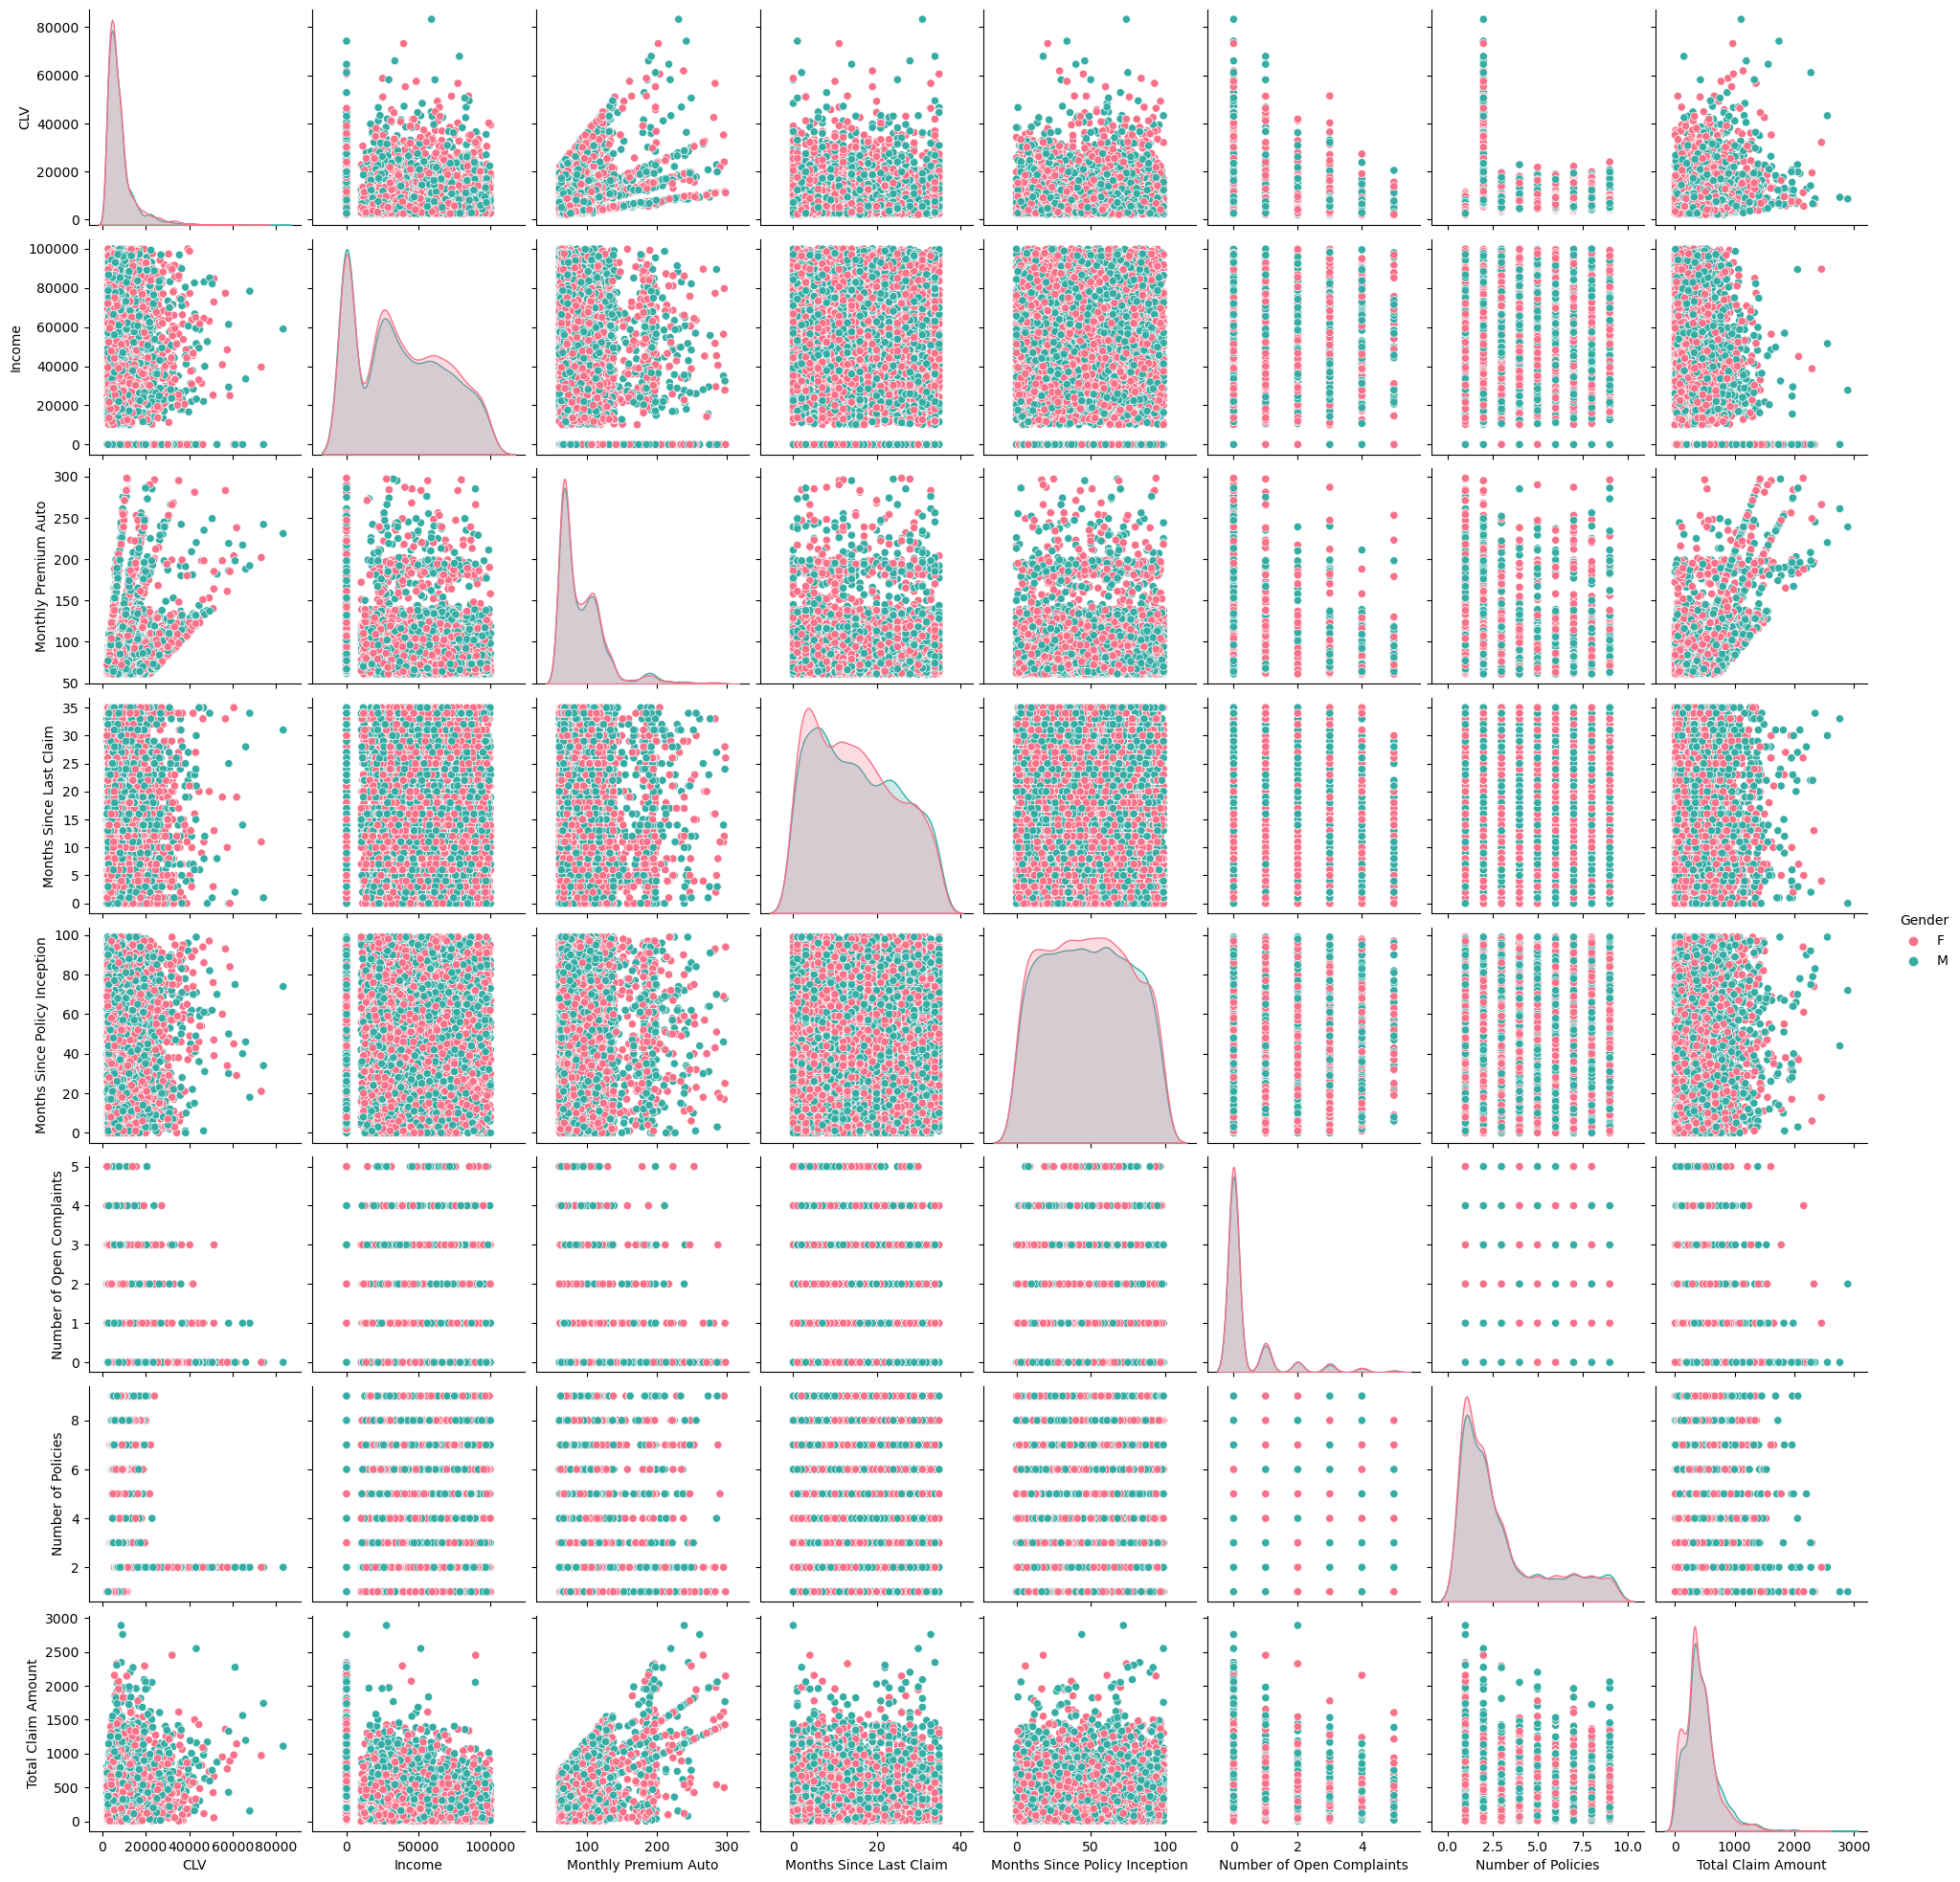

In [105]:
sns.pairplot(data=df, hue="Gender", diag_kind="kde", palette="husl")

In [106]:
# Compute mean, median, mode, standard deviation, and variance for 'CLV'
mean_clv = df['CLV'].mean()
median_clv = df['CLV'].median()
mode_clv = df['CLV'].mode()[0]  # mode() returns a Series
std_clv = df['CLV'].std()
var_clv = df['CLV'].var()

print("\nCLV statistics:")
print(f"Mean: {mean_clv}")
print(f"Median: {median_clv}")
print(f"Mode: {mode_clv}")
print(f"Standard Deviation: {std_clv}")
print(f"Variance: {var_clv}")


CLV statistics:
Mean: 8004.940474987081
Median: 5780.182197
Mode: 2004.350666
Standard Deviation: 6870.9676083569375
Variance: 47210195.87509026


In [107]:
# Dropping the 'Customer' column as it is likely an identifier
df_cleaned = df.drop("Customer", axis=1)
print("\nFirst few rows after dropping 'Customer' column:")
print(df_cleaned.head())


First few rows after dropping 'Customer' column:
        State           CLV Response  Coverage Education Effective To Date  \
0  Washington   2763.519279       No     Basic  Bachelor           2/24/11   
1     Arizona   6979.535903       No  Extended  Bachelor           1/31/11   
2      Nevada  12887.431650       No   Premium  Bachelor           2/19/11   
3  California   7645.861827       No     Basic  Bachelor           1/20/11   
4  Washington   2813.692575       No     Basic  Bachelor          3/2/2011   

  EmploymentStatus Gender  Income Location Code  ...  \
0         Employed      F   56274      Suburban  ...   
1       Unemployed      F       0      Suburban  ...   
2         Employed      F   48767      Suburban  ...   
3       Unemployed      M       0      Suburban  ...   
4         Employed      M   43836         Rural  ...   

  Months Since Policy Inception  Number of Open Complaints  \
0                             5                          0   
1                   

In [108]:
# Convert 'Effective To Date' to datetime
df_cleaned['Effective To Date'] = pd.to_datetime(df_cleaned['Effective To Date'])

# Reference date
ref_date = pd.Timestamp('2022-01-01')

# Calculate the number of days since the reference date
df_cleaned['Effective To Date'] = (ref_date - df_cleaned['Effective To Date']).dt.days

print("\nFirst few rows after converting 'Effective To Date' to days since reference date:")
print(df_cleaned.head())


First few rows after converting 'Effective To Date' to days since reference date:
        State           CLV Response  Coverage Education  Effective To Date  \
0  Washington   2763.519279       No     Basic  Bachelor               3964   
1     Arizona   6979.535903       No  Extended  Bachelor               3988   
2      Nevada  12887.431650       No   Premium  Bachelor               3969   
3  California   7645.861827       No     Basic  Bachelor               3999   
4  Washington   2813.692575       No     Basic  Bachelor               3958   

  EmploymentStatus Gender  Income Location Code  ...  \
0         Employed      F   56274      Suburban  ...   
1       Unemployed      F       0      Suburban  ...   
2         Employed      F   48767      Suburban  ...   
3       Unemployed      M       0      Suburban  ...   
4         Employed      M   43836         Rural  ...   

  Months Since Policy Inception  Number of Open Complaints  \
0                             5            

C:\Users\Aalok kumar\AppData\Local\Temp\ipykernel_14776\1464284557.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Effective To Date'] = pd.to_datetime(df_cleaned['Effective To Date'])


In [109]:
# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns identified for encoding:", categorical_cols)


Categorical columns identified for encoding: ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']


In [110]:
# Convert categorical columns to dummy variables
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
print("\nFirst few rows after encoding categorical variables:")
print(df_cleaned.head())


First few rows after encoding categorical variables:
            CLV  Effective To Date  Income  Monthly Premium Auto  \
0   2763.519279               3964   56274                    69   
1   6979.535903               3988       0                    94   
2  12887.431650               3969   48767                   108   
3   7645.861827               3999       0                   106   
4   2813.692575               3958   43836                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Total Claim Amount  \
0                          0                   1          384.811147   
1                         

In [111]:
# Splitting the dataset into features (X) and target (y)
x = df_cleaned.drop(['CLV'], axis=1)
y = df_cleaned['CLV']

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("\nShapes after train-test split:")
print(f"X_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shapes after train-test split:
X_train: (7307, 51), x_test: (1827, 51)
y_train: (7307,), y_test: (1827,)


### Linear Regression

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

li_m = LinearRegression()
li_m.fit(x_train,y_train)

LinearRegression()

In [113]:
li_m.score(x_train,y_train)

0.17136656475683065

In [114]:
li_m.score(x_test,y_test)

0.15529752350306048

### Random Forest Regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(criterion='squared_error',random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [117]:
model.score(x_train,y_train)

0.9590794358296059

In [118]:
model.score(x_test,y_test)

0.6941303377523815

### KNeighbors

In [119]:
model_knn=KNeighborsRegressor(n_neighbors=8,weights='uniform',leaf_size=30,p=2,algorithm='ball_tree')

In [121]:
model_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=8)

In [122]:
model_knn.score(x_test,y_test)

0.04894077128947616

In [123]:
model_knn.score(x_test,y_test)

0.04894077128947616

### Decision Tree 

In [124]:
model_dt = DecisionTreeRegressor(max_depth=6,criterion='squared_error')

In [125]:
model_dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [126]:
model_dt.score(x_train, y_train)

0.7194332906455867

In [127]:
model_dt.score(x_test, y_test)

0.650547262262748

In [128]:
x_train, y_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=22)
estimator_range=[2,4,6,8,10,12,14,16,18,20]
models=[]
scores=[]

In [129]:
model.score(x_train,y_train)

0.9051232877769917

### Hyperparameter tuning of random forest

In [136]:
from scipy.stats import zscore
zscore = x.apply(zscore)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [141]:
rf = RandomForestRegressor(n_estimators=300,max_depth=20)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300)

In [ ]:
# rf = RandomForestRegressor(**grid.best_params_)
# rf.fit(x_train,y_train)

In [143]:
rf.score(x_train,y_train)

0.9568068875736073

In [144]:
rf.score(x_test,y_test)

0.7153290534367549

### From all the models, Random Forest Regressor has given good score. so the best modal for predicting CLV is Random Forest.